# Compare two spectrum

In [2]:
import nomspectra.draw as draw
from nomspectra.spectrum import Spectrum
from nomspectra.spectra import SpectrumList
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load and plot

Load and assign spectrum. Than drop unassigned masses and normilize by sum of intensity

In [3]:
spec1 = Spectrum.read_csv("data/sample1.csv",
                            mapper = {"mw": "mass", "relativeAbundance": 'intensity'},
                            sep=',',
                            ignore_columns=["peakNo", "errorPPM",'formula', "DBE", "class", "z"],
                           )
spec1 = spec1.assign(brutto_dict={'C':(4,41),'H':(4,81),'O':(0,26),'N':(0,4)})
spec1 = spec1.drop_unassigned().normalize()

spec2 = Spectrum.read_csv("data/sample2.txt").assign(brutto_dict={'C':(4,41),'H':(4,81),'O':(0,26),'N':(0,4)})
spec2 = spec2.drop_unassigned().normalize()

Plot two spectra

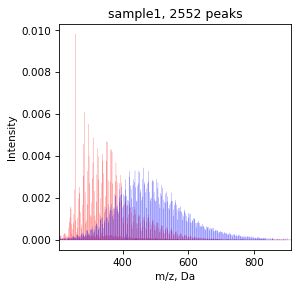

In [4]:
fig, ax = plt.subplots(figsize=(4,4), dpi=75)
draw.spectrum(spec2, color='red', alpha=0.5, ax=ax)
draw.spectrum(spec1, color='blue', alpha=0.5, ax=ax)

calculate metrics and Van Krevelen diagram

Text(0.5, 1.0, 'spec2, spec1')

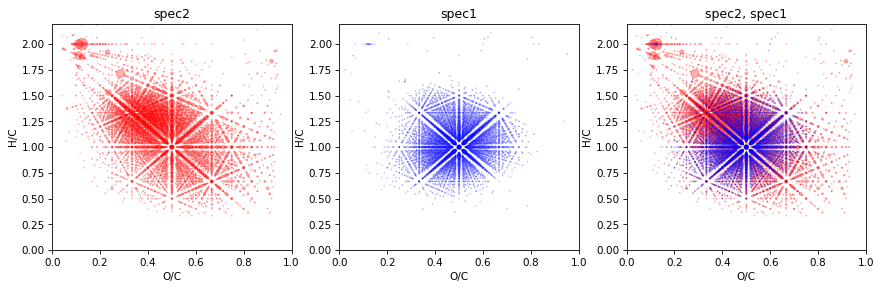

In [5]:
spec1 = spec1.calc_all_metrics()
spec2 = spec2.calc_all_metrics()

fig, ax = plt.subplots(figsize=(14,4),ncols=3, dpi=75)
draw.vk(spec2, color='red', ax=ax[0], title='')
draw.vk(spec1, color='blue', ax=ax[1], title='')
draw.vk(spec2, color='red', ax=ax[2], title='')
draw.vk(spec1, color='blue', ax=ax[2], title='')
ax[0].set_title('spec2')
ax[1].set_title('spec1')
ax[2].set_title('spec2, spec1')

## Boolean operations

Calculate and draw sum of spectrum

Text(0.5, 1.0, 'spec2 + spec1')

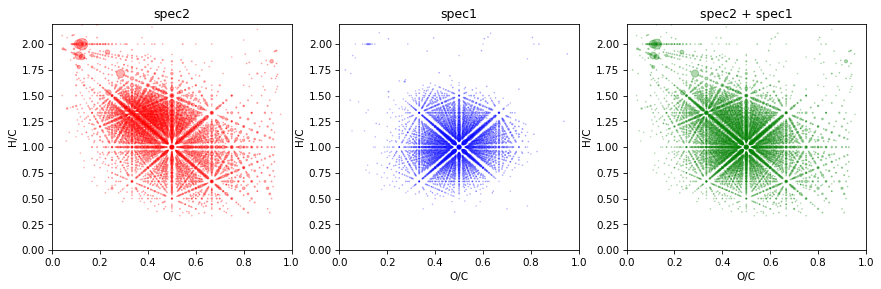

In [6]:
spec3 = spec1 + spec2 #'spec1 | spec2' - same

fig, ax = plt.subplots(figsize=(14,4),ncols=3, dpi=75)
draw.vk(spec2, color='red', ax=ax[0], title='')
draw.vk(spec1, color='blue', ax=ax[1], title='')
draw.vk(spec3, color='green', ax=ax[2], title='')
ax[0].set_title('spec2')
ax[1].set_title('spec1')
ax[2].set_title('spec2 + spec1')

Calculate and draw substrate spec1 from spec2

Text(0.5, 1.0, 'spec2 - spec1')

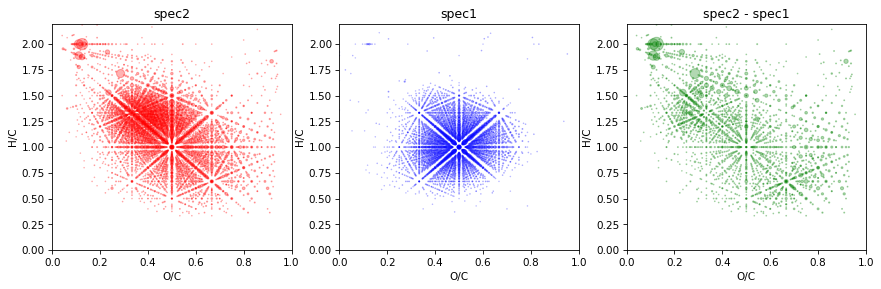

In [7]:
spec3 = spec2 - spec1

fig, ax = plt.subplots(figsize=(14,4),ncols=3, dpi=75)
draw.vk(spec2, color='red', ax=ax[0], title='')
draw.vk(spec1, color='blue', ax=ax[1], title='')
draw.vk(spec3, color='green', ax=ax[2], title='')
ax[0].set_title('spec2')
ax[1].set_title('spec1')
ax[2].set_title('spec2 - spec1')

Also we can look for spec prepared by substraction by intensity

Text(0.5, 1.0, 'spec2 - spec1')

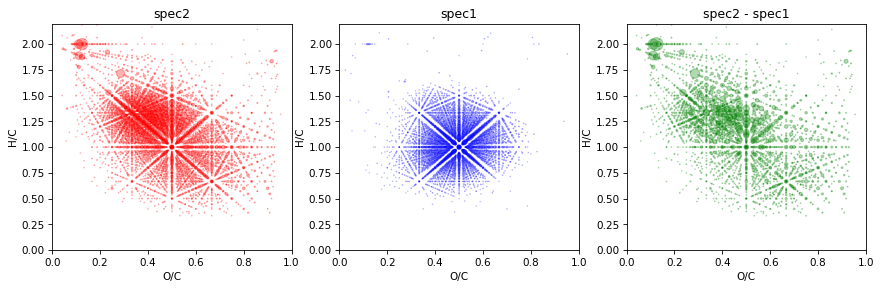

In [8]:
spec3 = spec2.intens_sub(spec1)

fig, ax = plt.subplots(figsize=(14,4),ncols=3, dpi=75)
draw.vk(spec2, color='red', ax=ax[0], title='')
draw.vk(spec1, color='blue', ax=ax[1], title='')
draw.vk(spec3, color='green', ax=ax[2], title='')
ax[0].set_title('spec2')
ax[1].set_title('spec1')
ax[2].set_title('spec2 - spec1')

Calculate and draw common of spec1 and spec2

Text(0.5, 1.0, 'spec2 & spec1')

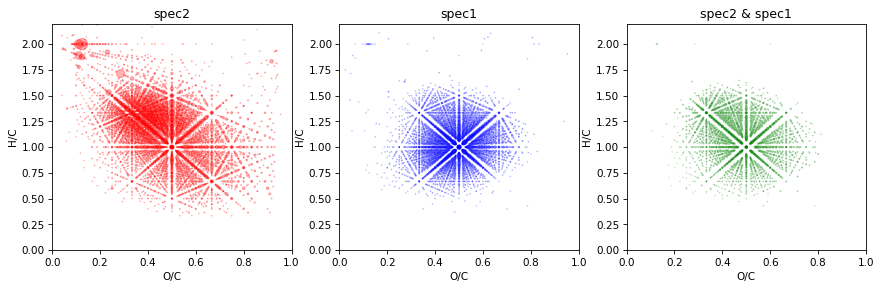

In [9]:
spec3 = spec1 & spec2

fig, ax = plt.subplots(figsize=(14,4),ncols=3, dpi=75)
draw.vk(spec2, color='red', ax=ax[0], title='')
draw.vk(spec1, color='blue', ax=ax[1], title='')
draw.vk(spec3, color='green', ax=ax[2], title='')
ax[0].set_title('spec2')
ax[1].set_title('spec1')
ax[2].set_title('spec2 & spec1')

Calculate and draw symmetric difference of spec1 and spec2

Text(0.5, 1.0, 'spec2 ^ spec1')

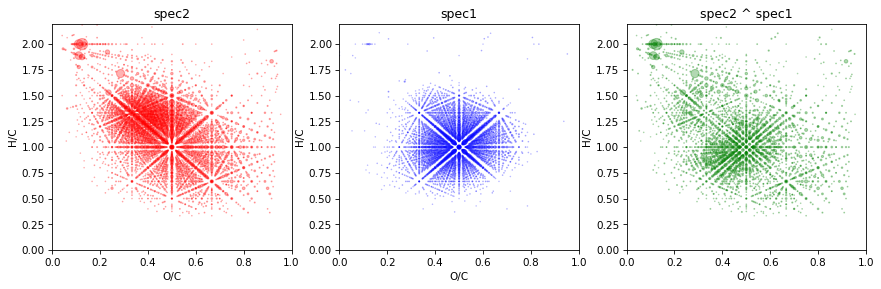

In [10]:
spec3 = spec1 ^ spec2

fig, ax = plt.subplots(figsize=(14,4),ncols=3, dpi=75)
draw.vk(spec2, color='red', ax=ax[0], title='')
draw.vk(spec1, color='blue', ax=ax[1], title='')
draw.vk(spec3, color='green', ax=ax[2], title='')
ax[0].set_title('spec2')
ax[1].set_title('spec1')
ax[2].set_title('spec2 ^ spec1')

## Simmilarity

Calculate simmilarity indexes. For now you can use common indexes - Cosine, Tanimoto and Jaccard

In [11]:
for index in ['cosine', 'tanimoto', 'jaccard']:
    value = spec1.simmilarity(spec2, mode=index)
    print(f'{index}: {round(value,3)} ')

cosine: 0.381 
tanimoto: 0.233 
jaccard: 0.362 


You can plot venn diagram for two ore three spectrum

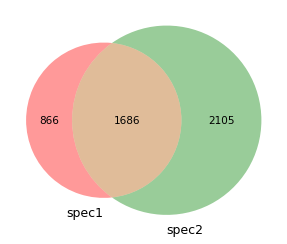

In [12]:
draw.venn(spec1, spec2)

## Calculate metrics

Calculate molecular class zones and get density. For plot we can use SpectrumList class from nomspectra.spectra

/opt/anaconda3/lib/python3.9/site-packages/nomspectra/spectra.py:318: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90, ha='right')


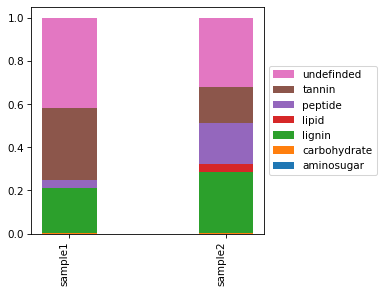

In [13]:
specs = SpectrumList([spec1, spec2])
specs.draw_mol_density()

Calculate DBE vs nO

(0.7450505598639489, 2.425647197353448)

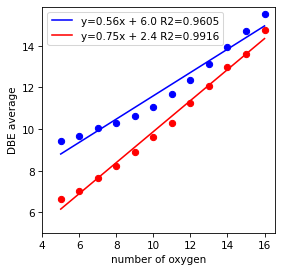

In [14]:
fig, ax = plt.subplots(figsize=(4,4), dpi=75)
spec1.get_dbe_vs_o(olim=(5,17), ax=ax, color='blue')
spec2.get_dbe_vs_o(olim=(5,17), ax=ax, color='red')

Also we can compare metrics

In [15]:
specs.get_mol_metrics()

,sample1,sample2
AI,0.009488,-0.070687
C,24.073906,18.514470
CAI,12.290746,10.215714
CRAM,0.811543,0.689125
DBE,12.464717,8.424983
DBE-O,0.681662,0.206055
DBE-OC,0.024155,0.005604
DBE_AI,0.681557,0.126226
H,25.218483,22.258804
H/C,1.051983,1.201142


And van krevelen square density

,sample1,sample2
1,0.000029,0.000058
2,0.001932,0.001132
3,0.001253,0.013009
4,0.000423,0.010109
5,0.001258,0.034803
6,0.002057,0.003226
7,0.198128,0.053871
8,0.257610,0.383808
9,0.020047,0.117417
10,0.000127,0.003145


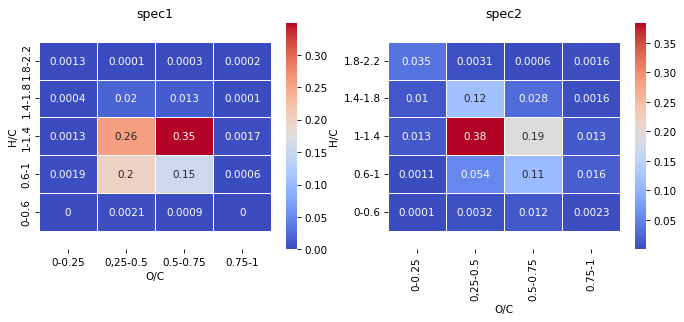

In [16]:
fig, ax = plt.subplots(figsize=(11,4), ncols=2, dpi=75)
spec1.get_squares_vk(ax=ax[0], draw=True)
spec2.get_squares_vk(ax=ax[1], draw=True)
ax[0].set_title('spec1')
ax[1].set_title('spec2')
specs.get_square_vk()